Notebook to test dataset and dataloader

In [1]:
import numpy as np
from data.getlandmark import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
from utils import *
from torch.utils.data import Dataset, DataLoader
# Get landmark using vocadataset.py
from data.vocaset import *

Get landmark using vocaset class!

In [14]:
train = vocadataset("train", landmark=True)
landmark, labels = train[0]
"""
train_ = vocadataset("val", landmark=True, savelandmarks=True)
landmark, lab = train_[0]
"""

[6, 11, 0, 4]


'\ntrain_ = vocadataset("val", landmark=True, savelandmarks=True)\nlandmark, lab = train_[0]\n'

In [15]:
dataloader = DataLoader(train, batch_size=1, collate_fn=collate_fn, shuffle=False)


In [6]:

dataloader_ = DataLoader(train_, batch_size=1,collate_fn=collate_fn, shuffle=False)
landmark_, labels_ = train_[0]

In [26]:
import glob
def make_gif(titolo="prova"):
    frames = [Image.open(image) for image in glob.glob("img/*.png")]
    frame_one = frames[0]
    frame_one.save("img/"+str(titolo)+".gif", format="GIF", append_images=frames,
               save_all=True, duration=250, loop=0)
    
    removing_files = glob.glob('img/*.png')
    for i in removing_files:
      os.remove(i)

In [27]:
from PIL import Image
make_gif("first")

In [23]:
for i, l in enumerate(landmark):
    plt.scatter(l[:,0], l[:,1], marker='.')
    plt.savefig(f"img/{i}.png")
    plt.close()



In [7]:
for i, (landmark_, lll, lab, ll) in enumerate(dataloader):
    print(landmark_.shape)
    if(i == 5):
        break



torch.Size([1, 219, 68, 3])
torch.Size([1, 232, 68, 3])
torch.Size([1, 358, 68, 3])
torch.Size([1, 267, 68, 3])
torch.Size([1, 308, 68, 3])
torch.Size([1, 348, 68, 3])


In [22]:
train_.landmarks.shape[0]

23745

In [8]:
for i, (landmark, lll, lab, ll) in enumerate(dataloader_):
    print(landmark.shape)
    if(i == 5):
        break

torch.Size([1, 219, 68, 3])
torch.Size([1, 232, 68, 3])
torch.Size([1, 358, 68, 3])
torch.Size([1, 267, 68, 3])
torch.Size([1, 308, 68, 3])
torch.Size([1, 348, 68, 3])


In [ ]:
landmark.shape

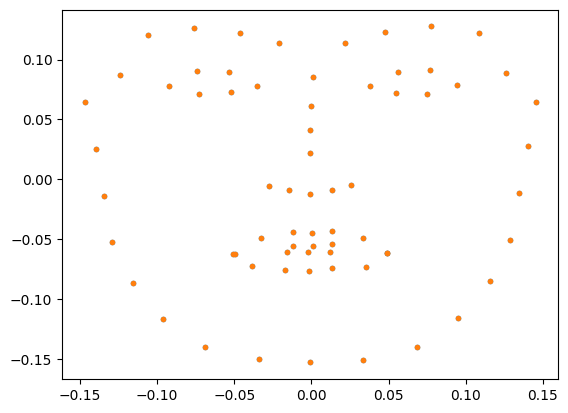

In [5]:
plt.scatter(landmark[0][:,0], landmark[0][:,1], marker='.')
plt.scatter(landmark_[0][:,0], landmark_[0][:,1], marker='.')
#plt.scatter(landmark[100][:,0], landmark[100][:,1], marker='.')

plt.show()

## Testing getOnly mouth landmark and plotting in 2D
### Get only mouth landmark

In [ ]:
test = vocadataset(type="test", landmark=True, mouthOnly=True)
landmark_mouth, labels = test[0]
plt.scatter(landmark_mouth[0][:,0], landmark_mouth[0][:,1], marker='.')
plt.scatter(landmark_mouth[10][:,0], landmark_mouth[10][:,1], marker='.')
plt.scatter(landmark_mouth[200][:,0], landmark_mouth[100][:,1], marker='.')
plt.show()

## Text dataloader 
#### The dataloader returns the *landmark*, original *landmark length* before padding, *labels* padded, and *label length* before padding

In [ ]:

testset = vocadataset("test", landmark=True)

dataloader = DataLoader(testset, batch_size=8, collate_fn=collate_fn, shuffle=True)

landmark, len_landmark, label, len_label = next(iter(dataloader))


## Test vertex plotting in 3D

In [ ]:
testset = vocadataset("test", landmark=False, mouthOnly=True)
dataloader = DataLoader(testset, batch_size=1, collate_fn=collate_fn, shuffle=True)

vertex,vertex_len ,lab, lab_len = next(iter(dataloader))
vertex_frame_0 = vertex[0][0]
pcshow(vertex_frame_0[:,0], vertex_frame_0[:,1], vertex_frame_0[:,2])


In [ ]:
vertex.shape

In [ ]:
import imageio
from PIL import Image

def create_gif(figures, filename, duration=0.5):
    images = []
    
    for fig in figures:
        # Create a temporary file to save the figure as an image
        temp_file = 'temp.png'
        fig.savefig(temp_file)
        
        # Open the temporary file using PIL
        image = Image.open(temp_file)
        images.append(image)
        
    # Save the images as a GIF using imageio
    imageio.mimsave(filename, images, duration=duration)
    
    # Remove the temporary file
    import os
    os.remove(temp_file)
    

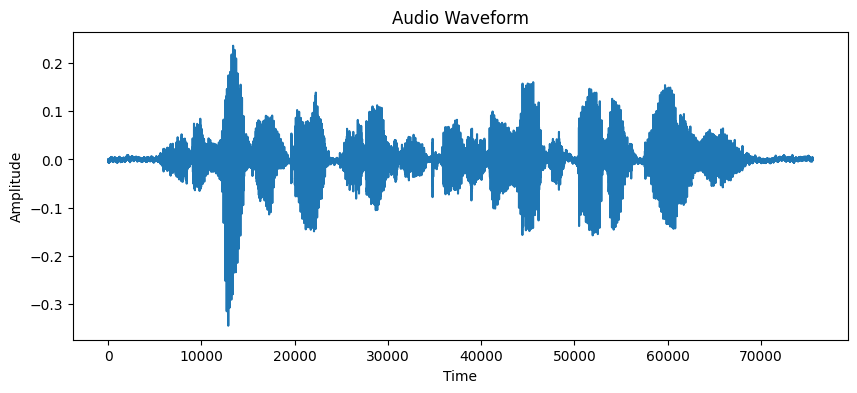

In [109]:
import torchaudio
import matplotlib.pyplot as plt

path = "/home/prasanna/Documents/UNIFI/Computer Graphics/LipReading/lipreading/dataset/audio/FaceTalk_170725_00137_TA/sentence01.wav"

audio, sr = torchaudio.load(path)
audio_n = audio.numpy()

plt.figure(figsize=(10, 4))
plt.plot(audio_n.T)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()


In [1]:
import pickle

audio_processed = pickle.load(open("/home/prasanna/Documents/UNIFI/Computer Graphics/LipReading/lipreading/dataset/processed_audio_deepspeech.pkl", 'rb'), encoding='latin1')


In [18]:
import torch
def getAudioInterval(audio):
    list_ = []
    for i in range(0,16):
        list_ = list_+ audio[i].tolist()
    
    return torch.tensor(list_)[None,:]



In [19]:
q = audio_processed['FaceTalk_170725_00137_TA']['sentence03']['audio'][0]
qq = getAudioInterval(q)

In [22]:
def getAudio(faceTalk='FaceTalk_170725_00137_TA', sentence='sentence03'):

    def getAudioInterval(audio):
        list_ = []
        for i in range(0,16):
            list_ = list_+ audio[i].tolist()
        
        return torch.tensor(list_)[None,:]

    #get length of the audio
    audio = audio_processed[faceTalk][sentence]['audio']

    len_audio = len(audio)

    for i in range(len_audio):
        if i == 0:
            audio_ = getAudioInterval(audio[i])
        else:
            audio_ = torch.cat([audio_, getAudioInterval(audio[i])], dim = 0)
    
    return audio_[None, :, :]

In [23]:
r = getAudio()

In [24]:
r.shape

torch.Size([1, 344, 464])

In [11]:
audio_processed['FaceTalk_170725_00137_TA']['sentence03']['audio'][0]

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ],
       [  0.        ,   0.        ,   0.        ,   0.    

In [129]:
list_ = []
for i in range(0,16):
    list_ = list_+ audio_processed['FaceTalk_170725_00137_TA']['sentence01']['audio'][6][i].tolist()

In [117]:
len(list_)

464

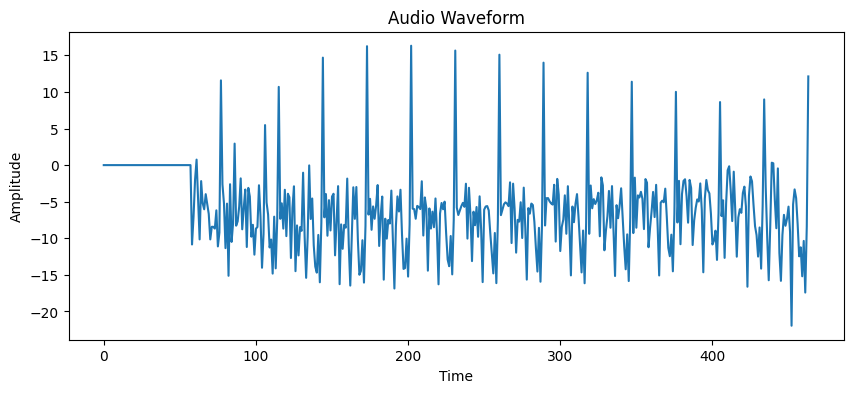

In [130]:
#audio_n = audio.numpy()

plt.figure(figsize=(10, 4))
plt.plot(list_)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')
plt.show()


In [53]:
count = 0
for i in range (204):
    count = count + len(audio_processed['FaceTalk_170728_03272_TA']['sentence01']['audio'][i])
count

3264

In [56]:
len(audio_processed['FaceTalk_170725_00137_TA']['sentence01']['audio'][0])

16

In [38]:
22000/204

107.84313725490196